In [18]:
# Here we load a bunch of stuff
import sys
p = ['../', '/home/contematto/github/seaborn/']
for pp in p:
    if pp not in sys.path:
        sys.path.insert(1, pp)
import expdir
from mvpa2.suite import *
fns = expdir.expdir()
from scipy.spatial import distance as dist
from scipy.stats import scoreatpercentile
from matplotlib import cm
import seaborn as sns
from os.path import join as pjoin

In [19]:
%matplotlib inline

Start here

In [4]:
def load_dsm(subnr):
    fn = pjoin(fns.mvpadir(subnr), 'roi_rsa_jimroi_5r_fisher_nooverlap/dsm_condition.hdf5')
    ds = h5load(fn)
    return ds

In [5]:
def make_ds_distance(ds):
    ds_ = ds.samples        
    ds_dist = squareform(pdist(ds_, metric='correlation'))
    return Dataset(ds_dist, sa=ds.sa, fa={'roi': ds.sa.targets})

In [7]:
# this contains the first level
roi_rdm = [load_dsm(i) for i in range(1, 34)]
# this contains the second level for each subject
roi_dist = [make_ds_distance(ds) for ds in roi_rdm]

`roi_rdm` is a list containing PyMVPA datasets of RDMs within each ROI; each sample (row) is one ROI, and each feature (column) is a pairwise distance. We have 64 features because the original RDM was 8x8.

In [12]:
print(roi_rdm[0])
print(roi_rdm[0].sa.targets)

<Dataset: 30x64@float64, <sa: centers,targets>>
['IFG1 - L' 'EV2 - L' 'EV1 - R' 'mFus - R' 'mFus - L' 'EV1 - L' 'EV2 - R'
 'TPJ - L' 'mMTG - L' 'vPreCun - L' 'pMTG - L' 'pMTG - R' 'vPreCun - R'
 'mMTG - R' 'TPJ - R' 'pFus - L' 'OccFus - R' 'MPFC - L' 'aFus - R'
 'MPFC - R' 'OccFus - L' 'pFus - R' 'mPreCun - R' 'dPreCun - L' 'aMTG - L'
 'IFG2 - R' 'aMTG - R' 'IFG2 - L' 'dPreCun - R' 'mPreCun - L']


`roi_dist` contains the distance matrix across rois, computed using correlation.

In [14]:
print(roi_dist[0])

<Dataset: 30x30@float64, <sa: centers,targets>, <fa: roi>>


We can just average the matrices and look at it

In [15]:
avg_dist = np.dstack(roi_dist).mean(axis=-1)

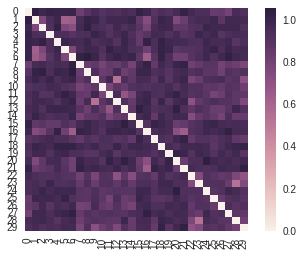

In [20]:
sns.heatmap(avg_dist, square=True)